# **Supervised Learning code for Disaster Tweet Classification**

✔✔✔

Installing the libraries


**Multiclass Text Classification Using BERT and Keras****
we will use ktrain (a lightweight wrapper around Keras) to build a model using the dataset employed in the scikit-learn tutorial: Working with Text Data.The objective is to accurately classify each text into one of these 2 classes. This will provide us an opportunity to see BERT in action on a relatively smaller training set.

In [1]:
!pip3 install ktrain==0.2.2

     |████████████████████████████████| 43 kB 110 kB/s 
  Created wheel for ktrain: filename=ktrain-0.2.2-py3-none-any.whl size=50418 sha256=bef0820aa56cb9e486cb6998249200309bf2a06fff7364ae6bfab6055bbe9947
  Stored in directory: /root/.cache/pip/wheels/25/24/60/e1b846b3dfad654a28194cf8a0797552041f30438d2f044def
  Created wheel for keras-bert: filename=keras_bert-0.86.0-py3-none-any.whl size=34147 sha256=bf49c7f61cf08dac4160dfc241ef61ea0f8035982f00e2f356d752d1b2dc1fd0
  Stored in directory: /root/.cache/pip/wheels/fc/c1/0a/eb9187261b3f192ac314aefb54fe66f50540c3edb906599633
  Created wheel for keras-transformer: filename=keras_transformer-0.38.0-py3-none-any.whl size=12941 sha256=80d3cfd452bd17e36bc87680ff0e4d142e99092eec692fe27688e1fee2cdad88
  Stored in directory: /root/.cache/pip/wheels/b3/67/58/bcfb43b6ab764496a446021a8d05991adffd48c16582381326
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-py3-none-any.whl size=7553 sha256=5716ab4dd3ac101b495222523c8559573b1f1f02

### Importing Libraries


In [2]:
from sklearn.model_selection import train_test_split

### Reading training file

In [3]:
import pandas as pd
train_df = pd.read_csv("../input/nlp-getting-started/train.csv")

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Splitting training data in to training and validation data

In [5]:
random_seed = 12342
x_train, x_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'], shuffle=True, test_size = 0.2, random_state=random_seed, stratify=train_df['target'])

**Convert data to features for BERT**
# **Load and Preprocess the Data**
Preprocess the data using the texts_from_array function (since the data resides in an array). If your documents are stored in folders or a CSV file you can use the texts_from_folder or texts_from_csv functions, respectively.

In [6]:
import ktrain
from ktrain import text

In [7]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          class_names= ["0", "1"],
                                                                                          preprocess_mode='bert',
                                                                                          
                                                                                          maxlen=65, 
                                                                                          max_features=35000)

downloading pretrained BERT model and vocabulary...
[██████████████████████████████████████████████████]
extracting pretrained BERT model and vocabulary...
done.

cleanup downloaded zip...
done.

preprocessing train...


preprocessing test...


# STEP 2: Load the BERT Model and Instantiate a Learner object
**Create Model Instance and train it for 6 epochs
**
# STEP 3: Train the Model
We train using one of the three learning rates recommended in the BERT paper: 5e-5, 3e-5, or 2e-5. Alternatively, the ktrain Learning Rate Finder can be used to find a good learning rate by invoking learner.lr_find() and learner.lr_plot(), prior to training. The learner.fit_onecycle method employs a 1cycle learning rate policy.



In [8]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=16)

Is Multi-Label? False
maxlen is 65
done.


In [9]:
learner.lr_find()             # briefly simulate training to find good learning rate
   

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
381/381 [==============================] - 187s 492ms/step - loss: 0.6820 - accuracy: 0.6140
Epoch 2/1024
381/381 [==============================] - 187s 491ms/step - loss: 0.4520 - accuracy: 0.8059
Epoch 3/1024
381/381 [==============================] - 189s 495ms/step - loss: 0.7011 - accuracy: 0.5734
Epoch 4/1024
381/381 [==============================] - 189s 496ms/step - loss: 2.8110 - accuracy: 0.5071


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


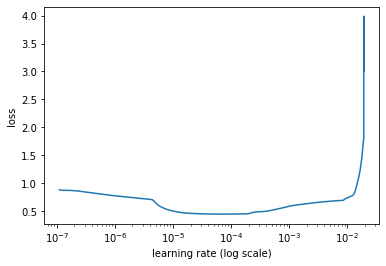

In [10]:
learner.lr_plot()

In [11]:
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
381/381 [==============================] - 199s 521ms/step - loss: 0.4799 - accuracy: 0.7750 - val_loss: 0.3935 - val_accuracy: 0.8299
Epoch 2/1024
381/381 [==============================] - 193s 507ms/step - loss: 0.3505 - accuracy: 0.8550 - val_loss: 0.3818 - val_accuracy: 0.8372
Epoch 3/1024
381/381 [==============================] - 193s 506ms/step - loss: 0.2892 - accuracy: 0.8900 - val_loss: 0.4002 - val_accuracy: 0.8372
Epoch 4/1024
381/381 [==============================] - ETA: 0s - loss: 0.2391 - accuracy: 0.9140
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
381/381 [==============================] - 192s 503ms/step - loss: 0.2391 - accuracy: 0.9140 - val_loss: 0.4223 - val_accuracy: 0.8365
Epoch 5/1024
381/381 [==========================

In [12]:
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=['No Disaster', 'Disaster'])

              precision    recall  f1-score   support

 No Disaster       0.84      0.89      0.86       869
    Disaster       0.84      0.77      0.80       654

    accuracy                           0.84      1523
   macro avg       0.84      0.83      0.83      1523
weighted avg       0.84      0.84      0.84      1523



array([[773,  96],
       [152, 502]])

### Getting predictor variable

In [13]:
# getting predictor variable
predictor = ktrain.get_predictor(learner.model, preproc)

In [14]:
learner.print_layers()

0 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fca944dbc10>
1 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fca94459810>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x7fca94c07fd0>
3 (trainable=True) : <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fcac804de90>
4 (trainable=True) : <tensorflow.python.keras.layers.merge.Add object at 0x7fca94493e10>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7fca901d8bd0>
6 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7fca90178fd0>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7fca90178d50>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7fca90158690>
9 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7fca9007ba50>
10 (trainable=True) : <t

### Getting predictions on test data

In [15]:
test_df = pd.read_csv("../input/nlp-getting-started/test.csv")
test_df["target"] = predictor.predict(test_df["text"].tolist())

test_df = test_df[["id", "target"]]


In [16]:
test_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [17]:
test_df.to_csv("submisssions.csv", index=False)